# Aggregate Random Forest Analysis
Since random forests are randomized by nature of the algorithm, we will be applying a random forest several times (100) to try and determine the actual importance of individual features

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score
import sklearn

In [72]:
africa = pd.read_csv('africa-ML-all_21-01-28.csv')
africa = africa.dropna('columns')
africa=sklearn.utils.shuffle(africa)
labels = africa['sahoStatusEHA']
data = africa.drop(columns=['sahoStatusEHA', 'country', 'christCountry', 'cumCasesLag1', 'cumCasesLag1P100KC', 'cumDeathsLag1', 'ebolaCasesN', 'gdpPerCap', 'geoDiffXdayNum', 'medDocsN']).select_dtypes(['number'])
#data = data.sample()

train_num = 44


training_data = data[0:train_num]
training_labels = list(labels[0:train_num])

test_data = data[train_num:]
test_labels = list(labels[train_num:])

<ipython-input-73-be63ba28eed5>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  plt.hist(np.array([training_labels, test_labels]) , 3,  histtype='bar', label=['training', 'test'])


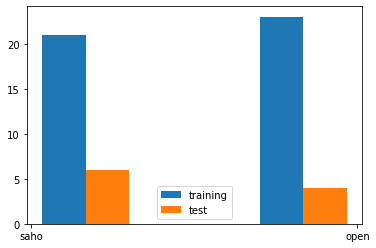

In [73]:
plt.hist(np.array([training_labels, test_labels]) , 3,  histtype='bar', label=['training', 'test'])
plt.legend()

In [74]:
feature_importance = {}
for i in np.arange(1):
    rf = RandomForestClassifier(n_estimators = 50, max_depth=5, criterion='entropy')
    rf.fit(training_data, training_labels)
    predictions = rf.predict(test_data)
    # Collect 10 most important features
    importance = pd.DataFrame({'feature': training_data.columns, 'importance': np.round(rf.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    importance = importance[:10]
    # Assign values to dictionary
    for imp in importance.values:
        if imp[0] not in feature_importance.keys():
            # If the key is not already there then add it
            feature_importance[imp[0]] = [imp[1]]
        else:
            feature_importance[imp[0]].append(imp[1])

In [75]:
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index')
final_features = feature_importance_df.agg(['mean', 'std', 'sem'], axis=1).sort_values('mean', ascending=False)[:25]
final_features['95-conf'] = 1.96*final_features['sem']
final_features['99-conf'] = 3*final_features['sem']

print(final_features)

                           mean  std  sem  95-conf  99-conf
tempDiffS                 0.097  NaN  NaN      NaN      NaN
SGGENPARLZS               0.049  NaN  NaN      NaN      NaN
ciaElectyOthRenew         0.044  NaN  NaN      NaN      NaN
ICREGDURS                 0.043  NaN  NaN      NaN      NaN
ciaArea                   0.038  NaN  NaN      NaN      NaN
ciaRefPetrolProdsImports  0.028  NaN  NaN      NaN      NaN
ciaBudgetSurplusDeficit   0.028  NaN  NaN      NaN      NaN
population                0.026  NaN  NaN      NaN      NaN
casesMD                   0.026  NaN  NaN      NaN      NaN
ciaInfantMortalityRate    0.026  NaN  NaN      NaN      NaN


/home/carterrhea/anaconda3/envs/astro/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Importance of Feature (%)')

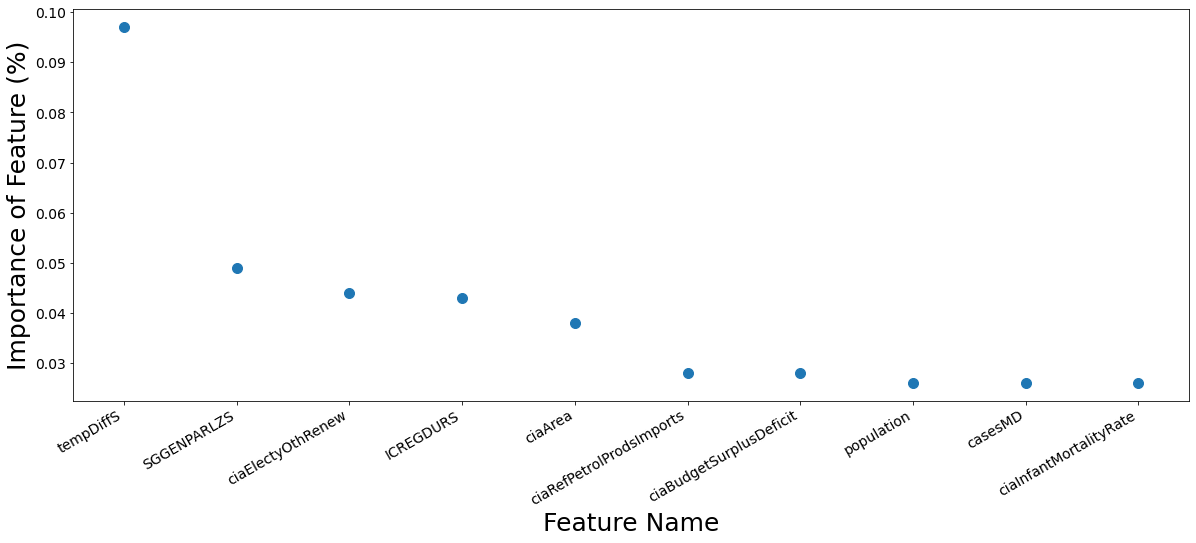

In [76]:
#with plt.xkcd():
fig = plt.figure(figsize=(20,8))
plt.errorbar(final_features.index, 'mean', yerr='99-conf', data=final_features, fmt='o', ms=10)
#plt.xticks(rotation=-60)
fig.autofmt_xdate()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature Name', fontsize=25)
plt.ylabel('Importance of Feature (%)', fontsize=25)
#plt.savefig('Feature-Importance.png')

In [77]:
predictions = rf.predict(test_data)
print(classification_report(test_labels, predictions, labels=list(set(test_labels))))

              precision    recall  f1-score   support

        saho       1.00      0.67      0.80         6
        open       0.67      1.00      0.80         4

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



# Without tempDiffS

In [58]:
data = africa.drop(columns=['sahoStatusEHA', 'dayNum', 'tempDiffS' ,'country', 'tempDiffS', 'christCountry', 'cumCasesLag1', 'cumCasesLag1P100KC', 'cumDeathsLag1', 'ebolaCasesN', 'gdpPerCap', 'geoDiffXdayNum', 'medDocsN']).select_dtypes(['number'])
data = data.drop(columns=['deathsMD', 'cumDeathsLag1P100KC'])
train_num = 14

training_data = data[0:train_num]
training_labels = list(labels[0:train_num])

test_data = data[train_num:]
test_labels = list(labels[train_num:])

In [ ]:
feature_importance = {}
for i in np.arange(100):
    rf = RandomForestClassifier(n_estimators = 20, max_depth=5, criterion='entropy')
    rf.fit(training_data, training_labels)
    predictions = rf.predict(test_data)
    # Collect 10 most important features
    importance = pd.DataFrame({'feature': training_data.columns, 'importance': np.round(rf.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    importance = importance[:10]
    # Assign values to dictionary
    for imp in importance.values:
        if imp[0] not in feature_importance.keys():
            # If the key is not already there then add it
            feature_importance[imp[0]] = [imp[1]]
        else:
            feature_importance[imp[0]].append(imp[1])

In [ ]:
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index')
final_features = feature_importance_df.agg(['mean', 'std', 'sem'], axis=1).sort_values('mean', ascending=False)
final_features['95-conf'] = 1.96*final_features['sem']

In [ ]:
with plt.xkcd():
    fig = plt.figure(figsize=(14,8))
    plt.errorbar(final_features.index, 'mean', yerr='95-conf', data=final_features, fmt='o')
    #plt.xticks(rotation=-60)
    fig.autofmt_xdate()
    plt.xlabel('Feature Name', size='xx-large', fontname='Comic Sans MS')
    plt.ylabel('Importance of Feature (%)', size='xx-large', fontname='Comic Sans MS')
    plt.show()

In [ ]:
print(classification_report(test_labels, predictions, labels=list(set(test_labels))))